In [17]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [20]:
import yfinance as yf

df_tesla = yf.download("TSLA")
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [21]:
df_tesla

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-06-09,308.579987,309.829987,281.850006,285.959991,140908900
2025-06-10,326.089996,327.829987,310.670013,314.940002,151256500


##### simple moving average

<Axes: xlabel='Date'>

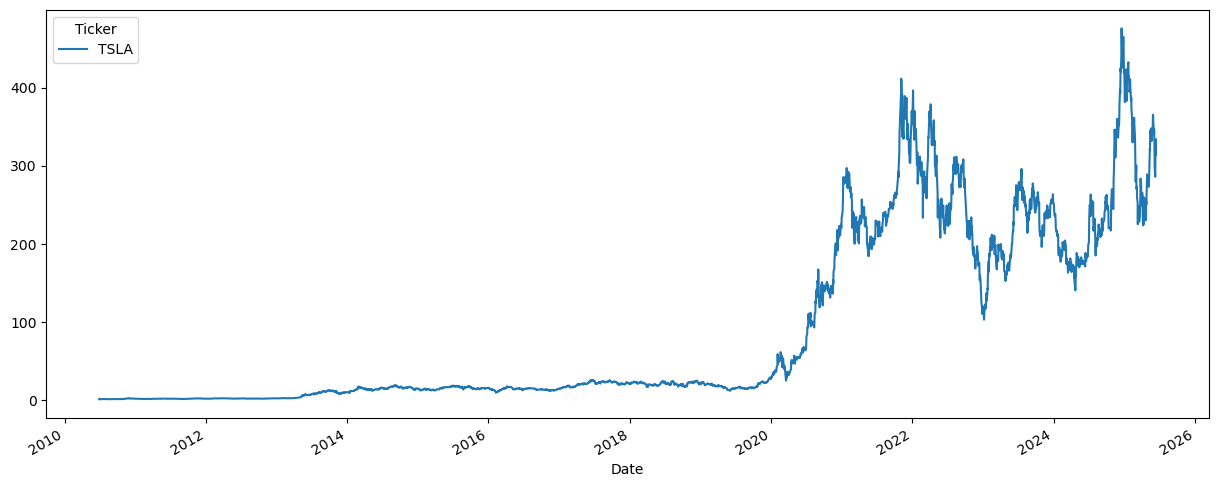

In [23]:
df_tesla['Open'].plot(figsize= (15,6))

In [24]:
df_tesla['Open: 10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

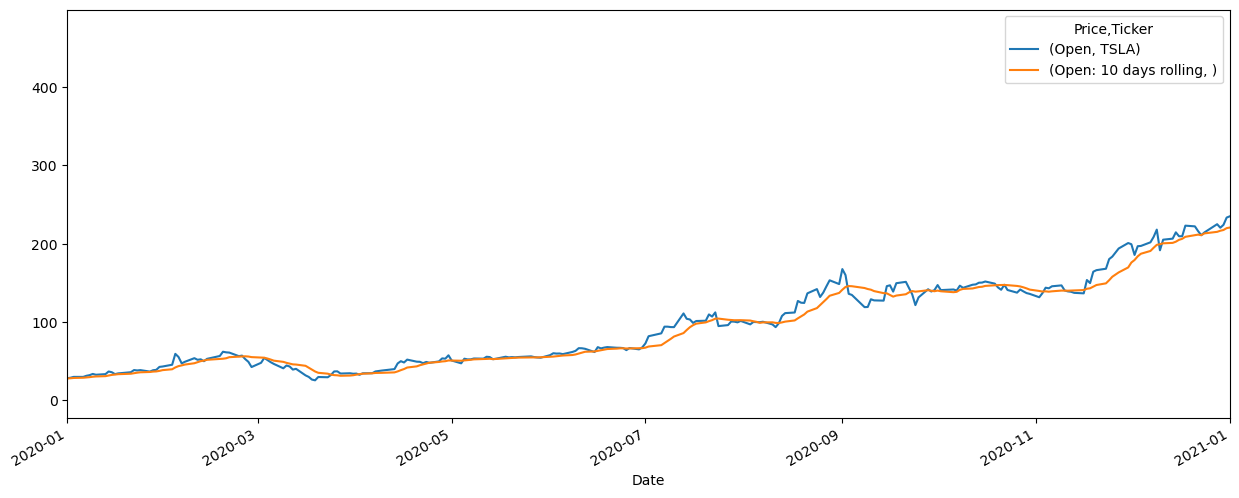

In [26]:
df_tesla[['Open','Open: 10 days rolling']].plot(xlim = ('2020-01-01', '2021-01-01'), figsize=(15,6))

In [27]:
df_tesla['Open: 20 days rolling']=df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open: 50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

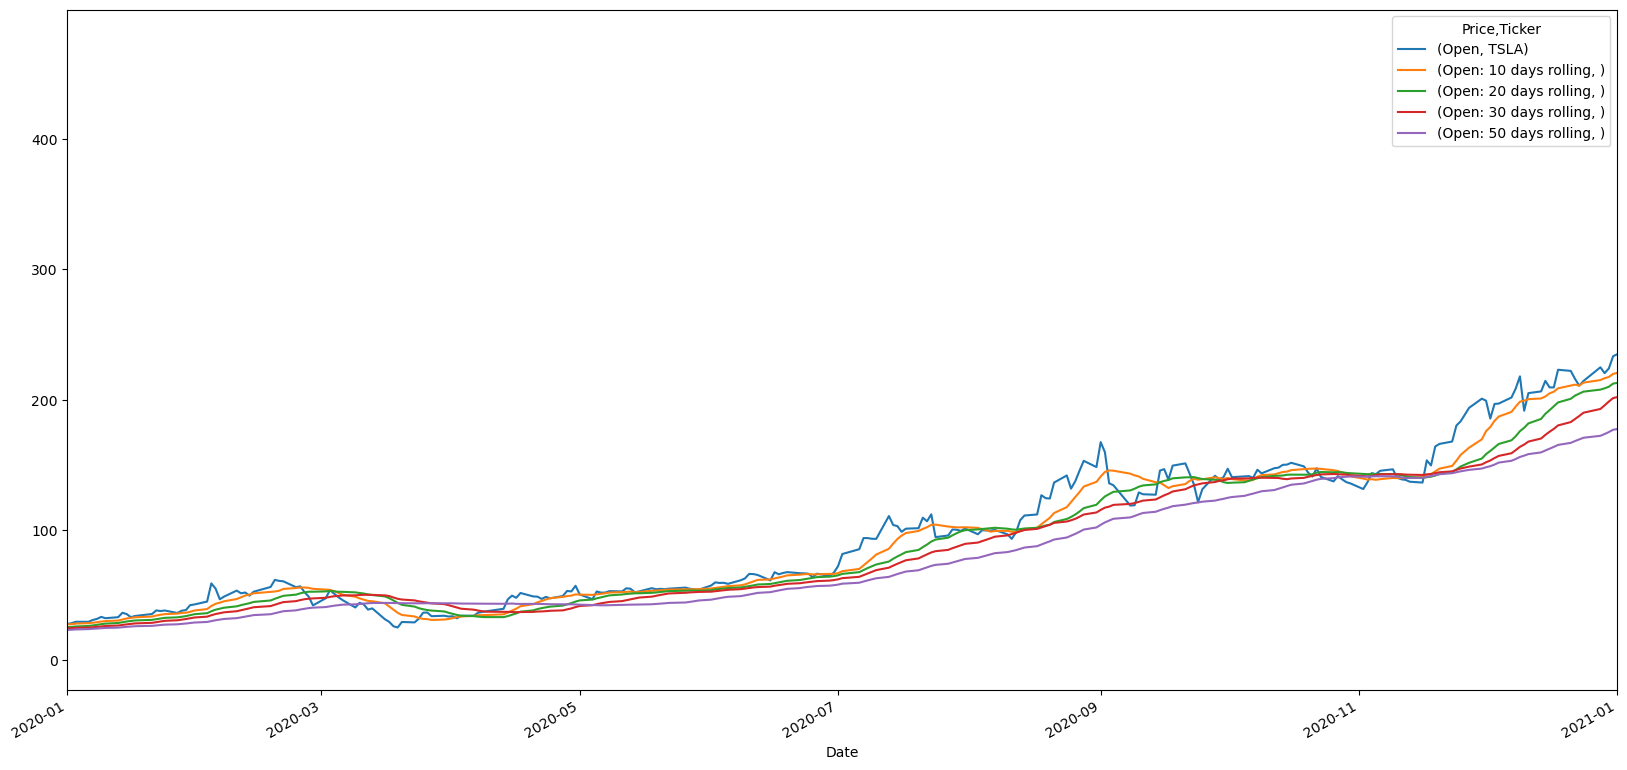

In [28]:
df_tesla[['Open','Open: 10 days rolling','Open: 20 days rolling','Open: 30 days rolling','Open: 50 days rolling' ]].plot(xlim = ('2020-01-01', '2021-01-01'), figsize=(20,10))

###### Cummulative moving average by expanding

<Axes: xlabel='Date'>

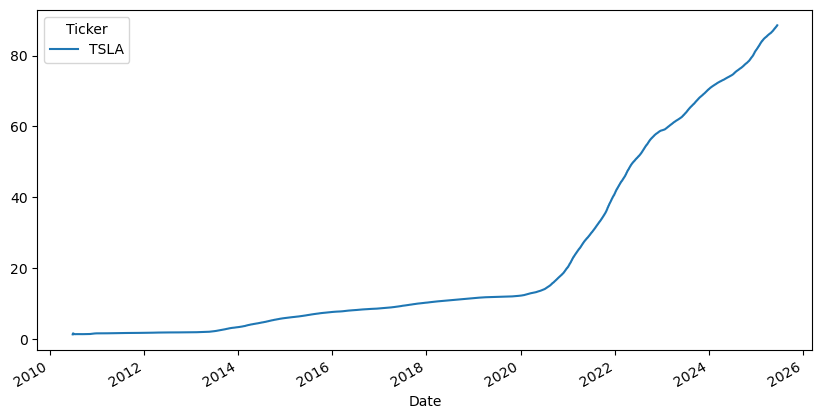

In [29]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

#### EWMA

An exponentially weighted moving average (EWMA) is a type of moving average that gives more weight to recent data points when calculating the average. This means that recent price changes have a greater impact on the EWMA than older data points, making it more responsive to current trends.

###### Key Characteristics:
- Weighted Average:
Unlike a simple moving average (SMA) that gives equal weight to all data points, the EWMA assigns exponentially decreasing weights to older data. 
- Sensitivity to Recent Changes:
Due to the increased weight on recent data, the EWMA reacts more quickly to price fluctuations and potential trend reversals. 
- Smoothing Effect:
While more sensitive than an SMA, the EWMA still provides a smoothing effect by reducing the impact of random price fluctuations. 

###### Calculation:
The EWMA is calculated recursively, meaning each new average is based on the previous one and the current data point. The formula for calculating the EWMA at time t is: 

In [ ]:
'''
EWMA(t) = (α * Price(t)) + ((1 - α) * EWMA(t-1))
'''

###### Where: 
- EWMA(t) is the exponentially weighted moving average at time t.
- Price(t) is the price at time t.
- α (alpha) is the smoothing factor, a number between 0 and 1, which determines the weight given to the most recent price.
- EWMA(t-1) is the exponentially weighted moving average from the previous period.

In [36]:
# EMA tesla shares
#smoothing factor 0.1

df_tesla['EWMA_0.1']= df_tesla['Open'].ewm(alpha = 0.1, adjust=False).mean()

<Axes: xlabel='Date'>

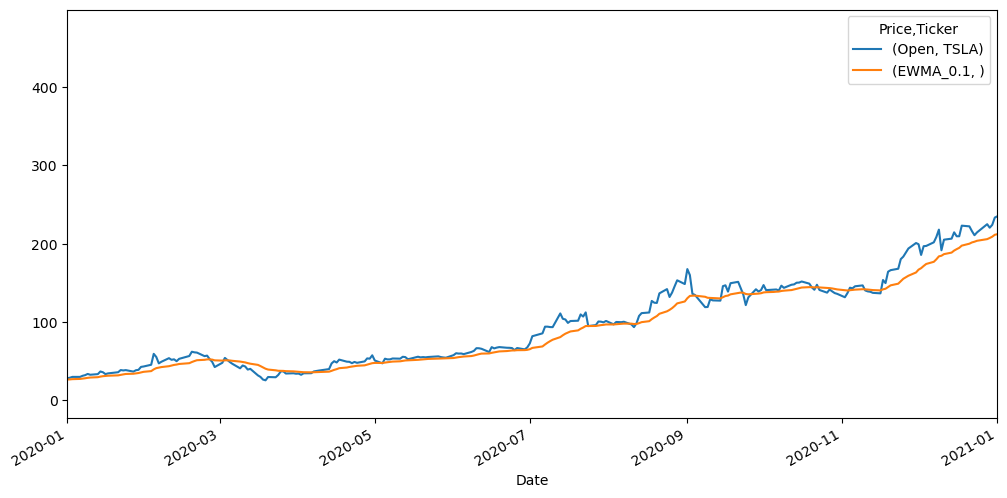

In [37]:
df_tesla[['Open', 'EWMA_0.1']].plot(xlim=('2020-01-01', '2021-01-01'), figsize=(12,6))

In [38]:
df_tesla['EWMA_0.3']= df_tesla['Open'].ewm(alpha = 0.3, adjust=False).mean()
df_tesla['EWMA_0.5']= df_tesla['Open'].ewm(alpha = 0.5, adjust=False).mean()

<Axes: xlabel='Date'>

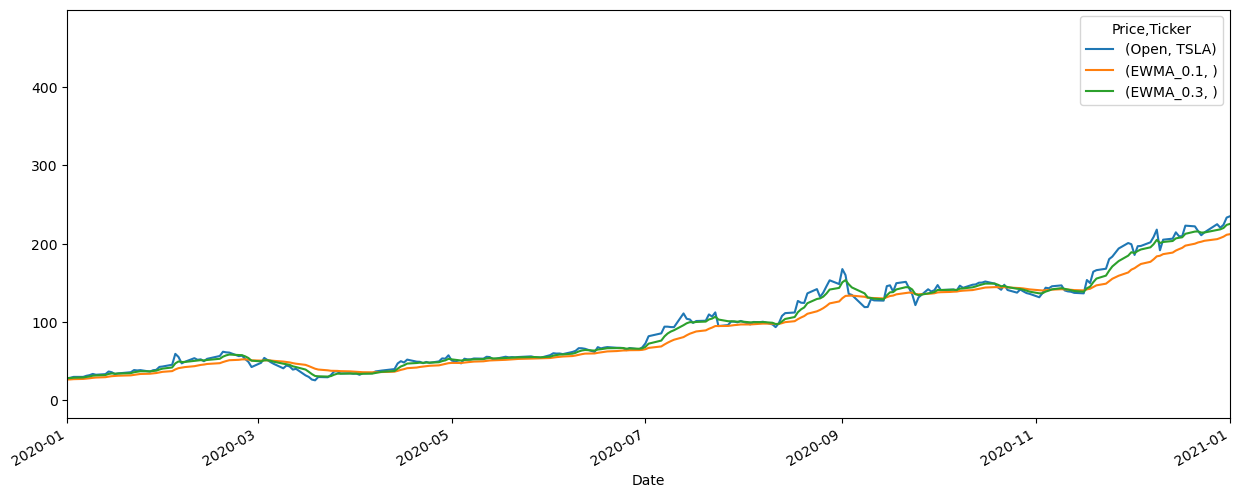

In [40]:
df_tesla[['Open', 'EWMA_0.1', 'EWMA_0.3']].plot(xlim=('2020-01-01', '2021-01-01'), figsize=(15,6))

#### EMA

In data science, the Exponential Moving Average (EMA) is a technique used to smooth out time series data and identify trends by giving more weight to recent data points. It is a variation of the moving average that reacts more quickly to changes in the data than a simple moving average (SMA). This makes it particularly useful for capturing recent trends and making more timely predictions. 

##### Key Concepts:
- Smoothing:
EMA helps reduce noise and random fluctuations in data, making underlying trends easier to identify. 
- Responsiveness:
Unlike SMA, which treats all data points equally, EMA assigns greater weight to recent observations. This makes it more sensitive to recent changes in the data. 
- Weighting:
The weighting is determined by a smoothing factor, often calculated as 2 / (period + 1). 
- Lag:
EMA generally exhibits less lag than SMA, meaning it responds faster to new information. 
##### How it works:
1. Start with an SMA:
Calculate the simple moving average over a chosen period. This serves as the initial EMA value. 
2. Calculate the Smoothing Factor:
Determine the smoothing factor (also called the weighting multiplier) based on the desired period. 
3. Apply the Formula:
Use the following formula to calculate the EMA for each subsequent data point: 

In [ ]:
'''    EMA = (Current Value * Smoothing Factor) + (Previous EMA * (1 - Smoothing Factor))'''